**Olá ,me chamo Márcio Henrique Matos de Freitas**

**Curso:**Engenharia de Computação

**Instituição:** Universidade Federal de Sergipe



**Tema:**Algoritmo KNN


No mundo de Aprendizado de Máquina existem centenas de algoritmos para resolver problemas, um deles é o KNN(K-nearest neighbors, ou “K-vizinhos mais próximos”), é utilizados para resolver problemas de classificação. Através de um conjunto de dados de Amostra de dados , eles pegam os "vizinhos mais próximos" e colocam em uma classe.


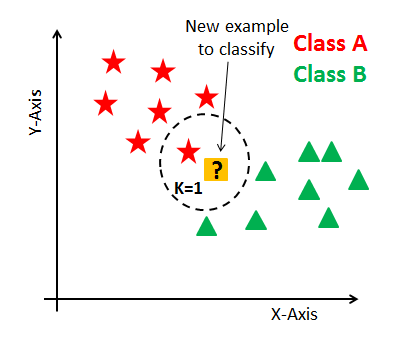


Para conseguimos alcançar esses resultados podemos utilizar alguns calculos, como

Distância Euclidiana

Distância de Hamming

Distância Manhattan

Distância de Markowski

Nesse Exemplo , Vamos utlizar a distância Euclidiana


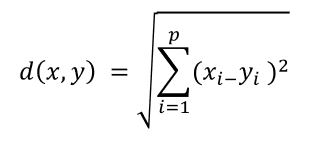

In [ ]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importando tensorflow e suas funções, camadas
from tensorflow import keras
from tensorflow.keras import layers
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.data import Dataset
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
print(tf.__version__)

2.8.2


In [ ]:
#coletando dados
#lendo dataset
#diretório dos aquivos
dataset_dados=pd.read_csv("/content/drive/My Drive/Algoritmo-knn/Dados Filmes.csv")
#mostrando dataset
dataset_dados.head()

,Filmes,Violência,Romance,Ação,Comédia
0,Invocação do Mal,14.6,0.0,13.6,0.0
1,Floresta Maldita,15.9,0.0,14.6,4.8
2,Meu Passado me Condena,10.0,5.3,10.4,18.0
3,Vizinhos,0.0,4.6,8.4,19.4
4,Deadpool,5.8,0.6,13.5,5.9


In [ ]:
dataset_dados.describe()

,Violência,Romance,Ação,Comédia
count,7.000000,7.000000,7.000000,7.000000
mean,9.042857,3.214286,12.628571,9.742857
std,7.259444,4.496083,3.901587,7.537430
min,0.000000,0.000000,8.400000,0.000000
25%,2.900000,0.000000,9.450000,5.050000
50%,10.000000,0.600000,13.500000,5.900000
75%,15.250000,4.950000,14.100000,16.400000
max,17.000000,12.000000,19.400000,19.400000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


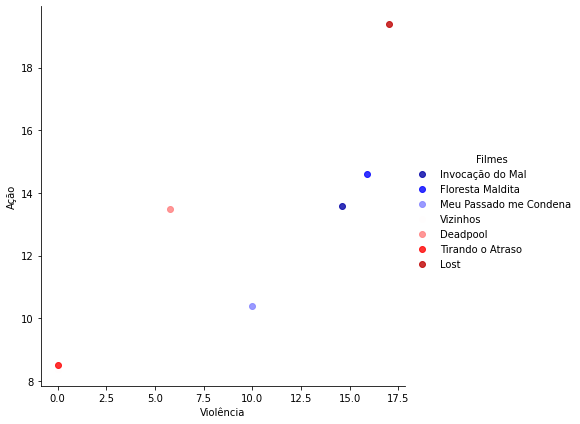

In [ ]:
sns.lmplot('Violência', 'Ação',data=dataset_dados, hue='Filmes', fit_reg=False, size=6, palette='seismic')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


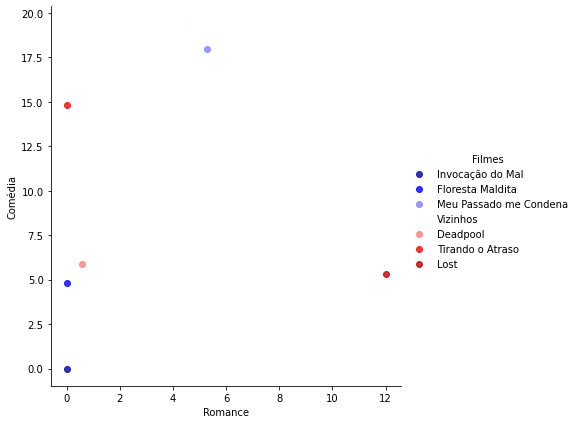

In [ ]:
sns.lmplot('Romance', 'Comédia',data=dataset_dados, hue='Filmes', fit_reg=False, size=6, palette='seismic')

acuracia 1 rate 0.25


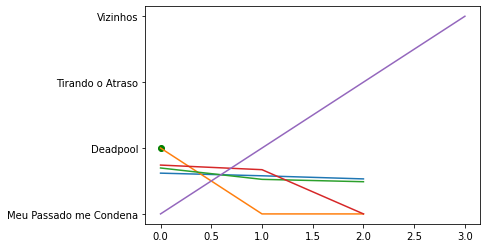

acuracia 2 rate 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


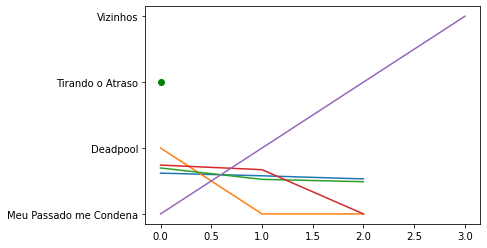

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


acuracia 3 rate 0.75


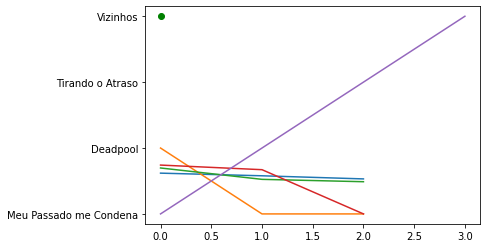

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


acuracia 3 rate 0.75


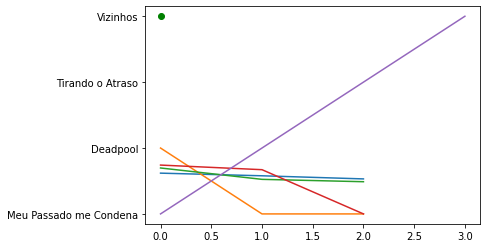

In [ ]:
#Função Distancia Euclidiana

def distancia_euclidi(elemento,x):
  distancia=0
  for i in range(len(elemento)):
    distancia+=(elemento[i]-x[i]**2)

  return distancia**(0.5)


def maioria_dos_elementos(elemento,x_treino,y_treino,y_verificar):
  minima_distancia=float('inf')
  maioria_dos_elementos_classe=0
  idx_most=0
  for i in range(np.shape(x_treino)[0]):
    atual_distancia=distancia_euclidi(elemento,x_treino[i])
    if atual_distancia<minima_distancia:
      minima_distancia=atual_distancia
      maioria_dos_elementos_classe=y_treino[i]
      idx_most=i
  y_verificar[idx_most]=False

  return maioria_dos_elementos_classe,y_verificar

def most_common(maioria_dos_elementos_classe):
  return max(set(maioria_dos_elementos_classe),key=maioria_dos_elementos_classe.count)


def LendoDados():

  #dividindo os dados de treinamento
  x_teste,x_treino=train_test_split(dataset_dados,test_size=0.3,random_state=32,shuffle=True)

  y_treino=list(x_treino['Filmes'])
  del x_treino['Filmes']

  y_teste=list(x_teste['Filmes'])
  del x_teste['Filmes']

  x_treino=normalize(x_treino,axis=0)
  x_teste=normalize(x_teste,axis=0)

  k=4
  acuracia=0
  for i in range(np.shape(x_teste)[0]):
    mostrar_classes=[0]*k
    y_verificar=[True]*len(y_treino)
    for j in range(k):
      mostrar_classes[j],y_verificar= maioria_dos_elementos(x_teste[i],x_treino,y_teste,y_verificar)
    if most_common(mostrar_classes)==y_teste[i]:
      acuracia+=1
    print("acuracia",acuracia,"rate",acuracia/np.shape(y_teste)[0])



    plt.plot(acuracia,'go')
    plt.plot(x_treino)
    plt.plot(y_teste)
    plt.show()

LendoDados()
